In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random as rd 
import importlib  
import Rebound_WTA_lib as WTA 
import numba 
importlib.reload(WTA) 

<module 'Rebound_WTA_lib' from '/home/cfs/yh415/code_py/HCO_Hoppfield/Rebound_WTA_lib.py'>

In [2]:
Time=1000 
Num_sample=100000 
dt=Time/Num_sample 
Time_line=np.arange(0,Time,dt) 

num_neuron=5 

x0=np.random.rand(num_neuron,6)*0 
x0[0,0]=-75 
x0[1,0]=-75 
x0[2,0]=-75 
x0[3,0]=-75 


noise=0.2
current=0
shift=-65
inhibition_matrix,excitation_matrix=WTA.ring_topology_gen(num_neuron,0.1,10)

excitation_matrix=excitation_matrix*0

external_input=np.random.rand(Num_sample,num_neuron)*0.5

for i in range(Num_sample):
    if i<Num_sample/5:
        external_input[i,0]+=2
    elif i<Num_sample/5*2:
        external_input[i,1]+=2
    elif i<Num_sample/5*3:
        external_input[i,2]+=2   
    elif i<Num_sample/5*4:
        external_input[i,3]+=2
    elif i<Num_sample/5*5:
        external_input[i,4]+=2
    

print(inhibition_matrix)
print(excitation_matrix)
    

[[ 0. 10. 10. 10. 10.]
 [10.  0. 10. 10. 10.]
 [10. 10.  0. 10. 10.]
 [10. 10. 10.  0. 10.]
 [10. 10. 10. 10.  0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


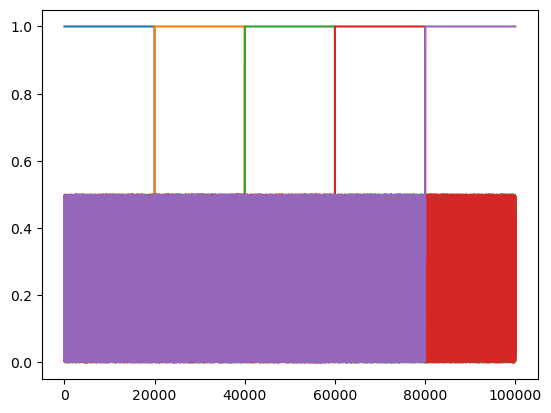

In [355]:
plt.plot(external_input[:,:])

In [4]:
outputs=WTA.simulation_hh(num_neuron,Num_sample,dt,x0,excitation_matrix,inhibition_matrix,noise,current,shift,external_input)

/tmp/ipykernel_1782617/1142082427.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize=8)


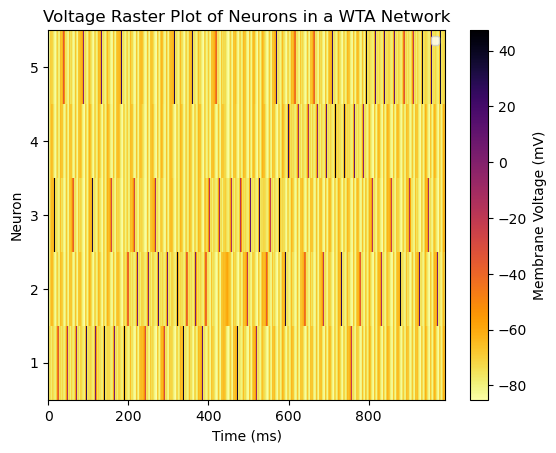

In [395]:
plot_start=1000 
data = np.array(outputs)[plot_start+1:,:,0] 
#flip data at axis 1 so that neuron 0 is at the bottom after the transpose
data = np.flip(data, axis=1)
# Assume dt is defined and data is already sliced as in your snippet
plt.imshow(data.T, aspect='auto', interpolation='none', cmap='inferno_r', 
           extent=[0, data.shape[0] * dt, 0, data.shape[1]])
tick_positions = np.arange(0.5, 5, 1)
neuron_names = ['1','2','3','4','5']
plt.yticks(tick_positions, neuron_names, fontsize=10)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron')
plt.title('Voltage Raster Plot of Neurons in a WTA Network')
plt.colorbar(label='Membrane Voltage (mV)')

# # Assuming input_current is a 2D array with shape (n_time, 5) containing the input currents
# time = np.linspace(0, data.shape[0] * dt, data.shape[0])

# # Adjust the scaling factor as needed so that the current traces are visible relative to the raster plot
# scaling_factor = 0.1  # example value

# for i in range(5):
#     # Offset each current trace so that its center is at the corresponding row (i+0.5)
#     plt.plot(time, external_input[plot_start:, i]  * scaling_factor + (i + 0.5),alpha=0.5)

plt.legend(loc='upper right', fontsize=8)
plt.savefig('WTA_raster_plot.png')
plt.show()

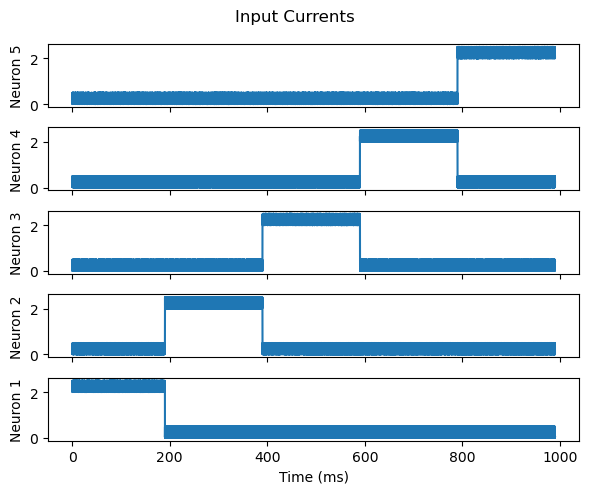

In [396]:
input_currents = np.array(external_input[plot_start:, ::-1])
time = np.linspace(0, data.shape[0] * dt, data.shape[0])

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(6, 5))
for i in range(5):
    axs[i].plot(time, input_currents[:, i])
    axs[i].set_ylabel(f"Neuron {5-i}")
axs[-1].set_xlabel('Time (ms)')
fig.suptitle('Input Currents')
plt.tight_layout()
plt.savefig('WTA_raster_plot_current.png')
plt.show()

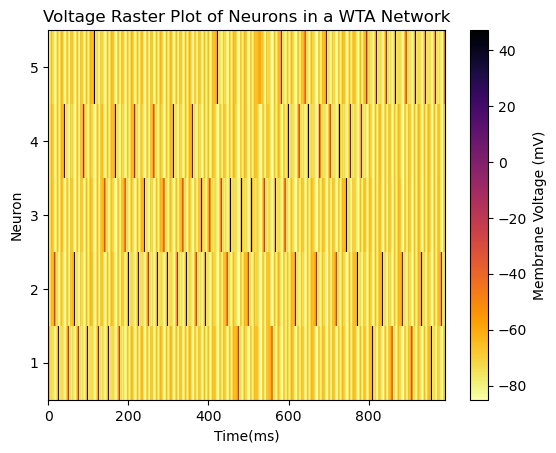

In [362]:
plot_start=1000 
data = np.array(outputs)[plot_start:,:,0] 
#flip data at axis 1 so that neuron 0 is at the bottom after the transpose
data = np.flip(data, axis=1)
# Use imshow to create a raster plot, transposing so neurons appear on the y-axis. 
plt.imshow(data.T, aspect='auto', interpolation='none', cmap='inferno_r',extent=[0, data.shape[0] * dt, 0, data.shape[1]]) 
tick_positions = np.arange(0.5, 5, 1)
# Define the neuron names you want to show (make sure the list length equals num_neurons)
neuron_names = ['1','2','3','4','5']
plt.yticks(tick_positions, neuron_names, fontsize=10)
plt.xlabel('Time(ms)') 
plt.ylabel('Neuron') 
plt.title('Voltage Raster Plot of Neurons in a WTA Network') 
plt.colorbar(label='Membrane Voltage (mV)') 
plt.savefig('WTA_raster_plot.png')
plt.show() 

In [141]:
Time=6000 
Num_sample=600000 
dt=Time/Num_sample 
Time_line=np.arange(0,Time,dt) 

num_neuron=5 

x0=np.random.rand(num_neuron,6)*0 
x0[0,0]=0
x0[1,0]=-75 
x0[2,0]=-75 
x0[3,0]=-75 


noise=0.1
current=2
i_shift=-65
e_shift=10
inhibition_matrix,excitation_matrix=WTA.ring_topology_gen(num_neuron,1,15)

excitation_matrix=excitation_matrix

external_input=np.random.rand(Num_sample,num_neuron)*0.0


print(inhibition_matrix)
print(excitation_matrix)

[[ 0. 15. 15. 15. 15.]
 [15.  0. 15. 15. 15.]
 [15. 15.  0. 15. 15.]
 [15. 15. 15.  0. 15.]
 [15. 15. 15. 15.  0.]]
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
@numba.njit
def simulation_optimized(num_neuron, Num_sample, dt, x0, excitation_matrix, inhibition_matrix, noise, current, i_shift,e_shift):
    # Initial conditions
    e_event = 0.0
    i_e_event = 0.0
    d_current = 0.0
    excitation_inhibition_control=0
    event_counter = True
    event_counter1 = True

    outputs = np.empty((Num_sample + 1, num_neuron, 6))
    inputs = np.empty((Num_sample + 1, 1))
    d_current_path = np.empty(Num_sample + 1)
    e_event_path = np.empty(Num_sample + 1)
    i_e_event_path = np.empty(Num_sample + 1)
    
    d_current_path[0] = d_current
    i_e_event_path[0] = i_e_event
    e_event_path[0] = e_event 
    outputs[0] = x0.copy()
    inputs[0, 0] = 0.0
    x = x0.copy()
    
    ent_control = 0.0
    fre_control = 0.0

    for i in range(Num_sample):
        # Activate control after time > 1000
        if i * dt > 1100.0:
            ent_control = 1.0
        if i * dt > 2100.0:
            fre_control = 1.0

        if i*dt > 100:

            excitation_inhibition_control = 1

        y = np.sin(i * dt / 7.0)
        
        event = 0
        event1 = 0
        
        if event_counter and (x[0, 0] > -40.0):
            event = 1
            event_counter = False
        elif x[0, 0] < -45.0:
            event_counter = True

        if event_counter1 and (y > 0.97):
            event1 = 1
            event_counter1 = False
        elif y < 0.95:
            event_counter1 = True


        # external_rhythm = 0.0

        # Update e_event exactly as in your original:
        delta_e = (((event1 - event) - e_event * dt) / 250.0) * fre_control
        e_event = e_event + delta_e
        # if e_event > 10/50.0:
        #     e_event = 10/50.0
        # elif e_event < -10/50.0:
        #     e_event = -10/50.0

        i_e_event += (-i_e_event + 1000*abs(e_event)) * fre_control *dt/500

        # Update d_current as in the original (with clamping)
        temp_d = d_current + e_event * 2/250 * dt 
        if temp_d > (3.0 - current):
            temp_d = 3.0 - current
        elif temp_d < (-2 - current):
            temp_d = -2 - current
        d_current = temp_d * fre_control

        # Build the external input vector u
        u = np.zeros(num_neuron)
        # Replicate: (event_counter1==False) * (40.0 + 80.0) - 80.0
        temp_val = (int(not event_counter1) * 120.0) - 80.0
        # Multiply by control and the boolean check (converted to 0 or 1)
        factor = ent_control * (1.0 if np.abs(i_e_event) > (1.5) else 1.0)
        
        # Compute the synaptic drive for all neurons
        syn_val = WTA.syn_hh_numba(temp_val, 0, -45.0)
        for j in range(num_neuron):
            u[j] += syn_val * factor
        # For the first neuron, use a different parameter value (2.2)
        u[0] = WTA.syn_hh_numba(temp_val, 2, -45.0) * factor

        # Compute the state change with your numba‐optimized topology function
        dx = WTA.ss_hh_topology(num_neuron, x, u, excitation_matrix*excitation_inhibition_control, inhibition_matrix*excitation_inhibition_control,
                                  noise, current+d_current , i_shift,e_shift, 0.1, 0.1)
        x = x + dx * dt

        # Build inputs similarly to original code:
        inputs[i + 1, 0] = (int(not event_counter1) * 120.0) * ent_control - 80.0
        outputs[i + 1] = x
        d_current_path[i + 1] = d_current
        e_event_path[i + 1] = e_event
        i_e_event_path[i + 1] = i_e_event

    return outputs, inputs, d_current_path, e_event_path,i_e_event_path

In [177]:
outputs, inputs, d_current_path, e_event_path, i_e_event_path = simulation_optimized(num_neuron, Num_sample, dt, x0, excitation_matrix*10, inhibition_matrix, noise, current,i_shift,e_shift)

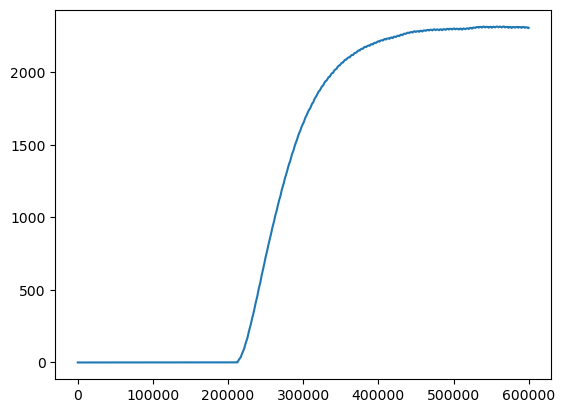

In [178]:
plt.plot(i_e_event_path)

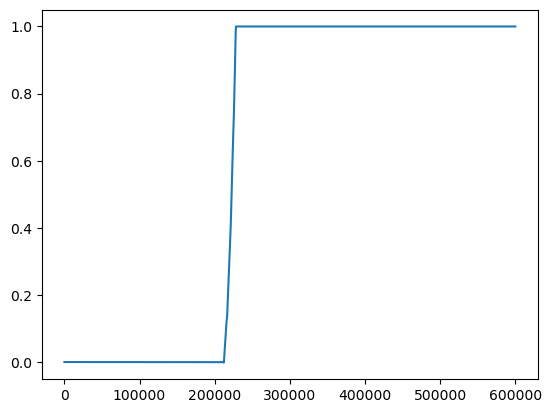

In [179]:
plt.plot(d_current_path)

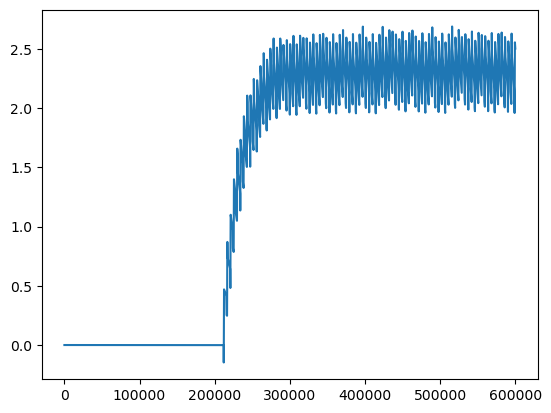

In [180]:
plt.plot(e_event_path)

(590000, 6)


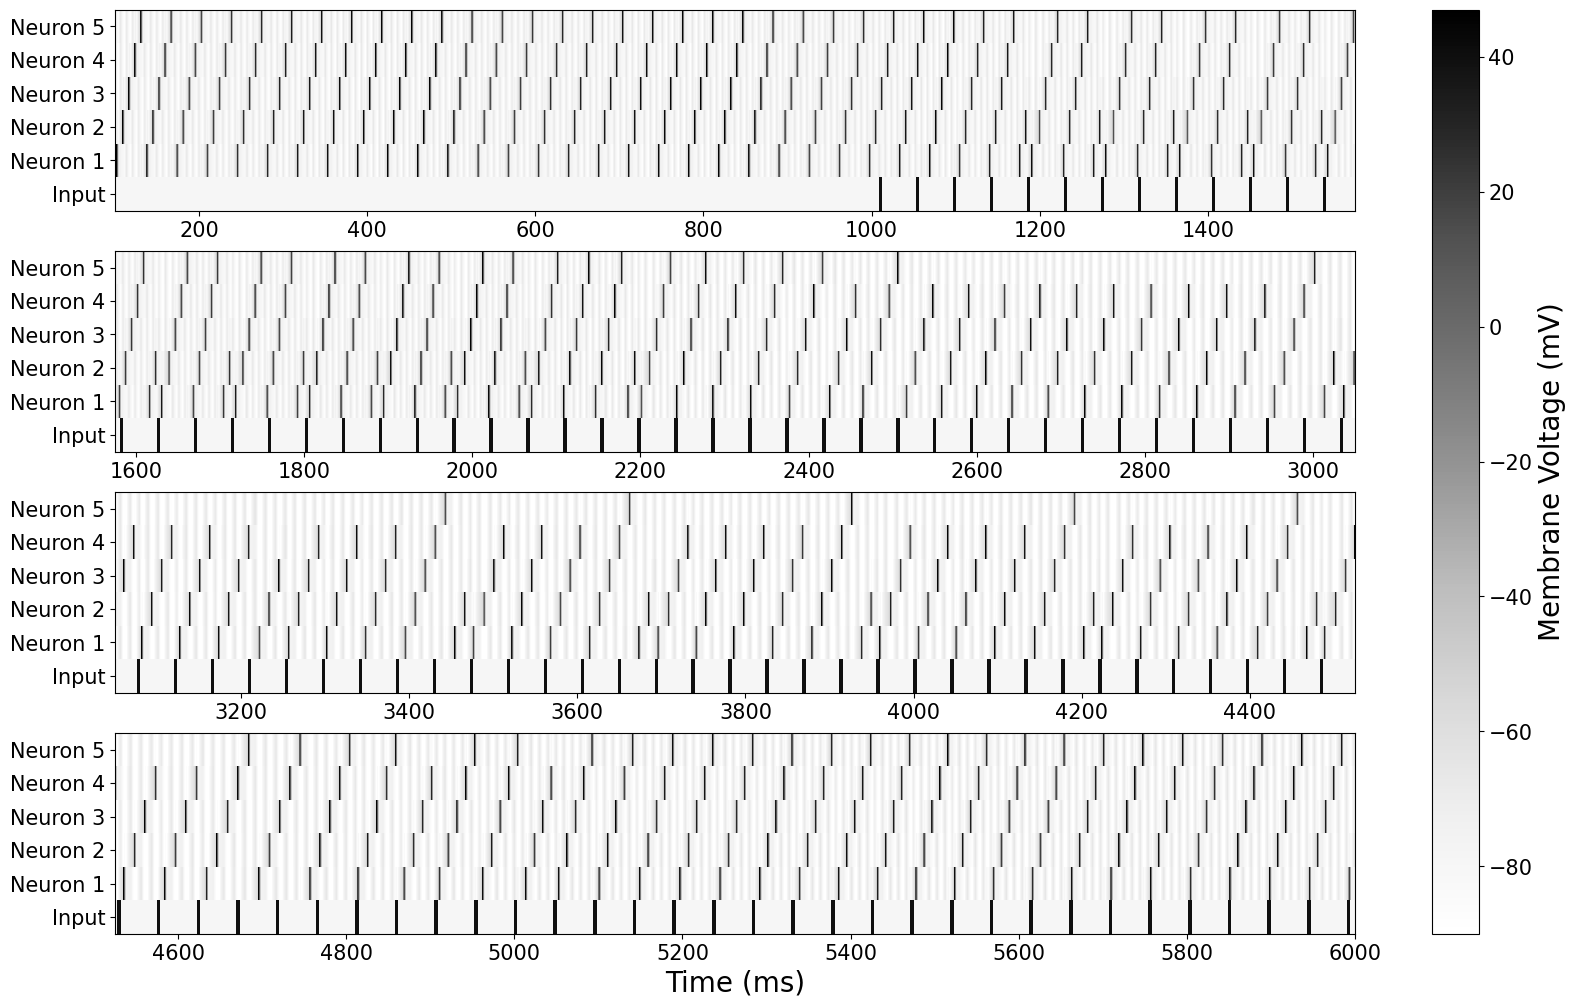

In [166]:
Time_line=np.arange(0,Time,dt)
start_time=int(100/dt)
data1 = np.array(outputs)[start_time+1:,::-1,0]
data2 = (inputs)[start_time+1:] 

data= np.concatenate((data1.T, data2.T), axis=0).T

print(data.shape)  # Expected output: (10, number_of_time_steps)

vmin_val = -90 
vmax_val = np.max(data)

caption_size=20
tick_size=15
label_size=20

vertical_lines = [900, 1900, 5000]

n_timepoints = data.shape[0]
n_segments = 4  # for instance, split into 4 segments
segment_length = n_timepoints // n_segments

fig, axes = plt.subplots(n_segments, 1, figsize=(20, 12), sharey=True)


for i, ax in enumerate(axes):
    start = i * segment_length
    # Ensure the last segment includes any leftover points
    end = (i+1) * segment_length if i < n_segments - 1 else n_timepoints
    segment = data[start+start_time:end+start_time, :].T
    im = ax.imshow(segment, aspect='auto', interpolation='none', cmap='Greys', vmin=vmin_val, vmax=vmax_val,
                   extent=[(start +start_time)* dt, (end +start_time)*dt, 0, data.shape[1]])
    tick_positions = np.arange(0.5, 6, 1)
    # Define the neuron names you want to show (make sure the list length equals num_neurons)
    neuron_names = ['Input','Neuron 1','Neuron 2','Neuron 3','Neuron 4','Neuron 5']
    ax.set_yticks(tick_positions, neuron_names, fontsize=tick_size)
    ax.tick_params(axis='x', labelsize=tick_size)
    # ax.set_title(f'Time: {start*dt:.1f} ms - {end*dt:.1f} ms')

    # for line in vertical_lines:
    #     if (start+start_time)*dt <= line <= (end+start_time)*dt:
    #         ax.axvline(x=line, color='blue', linestyle='--', linewidth=5)

plt.xlabel('Time (ms)', fontsize=label_size)
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), label='Membrane Voltage (mV)')
cbar.set_label('Membrane Voltage (mV)', fontsize=label_size)  # Change label font size
cbar.ax.tick_params(labelsize=tick_size)

plt.show()

# fig.savefig('new_total_voltage_raster.png')

(590000, 6)


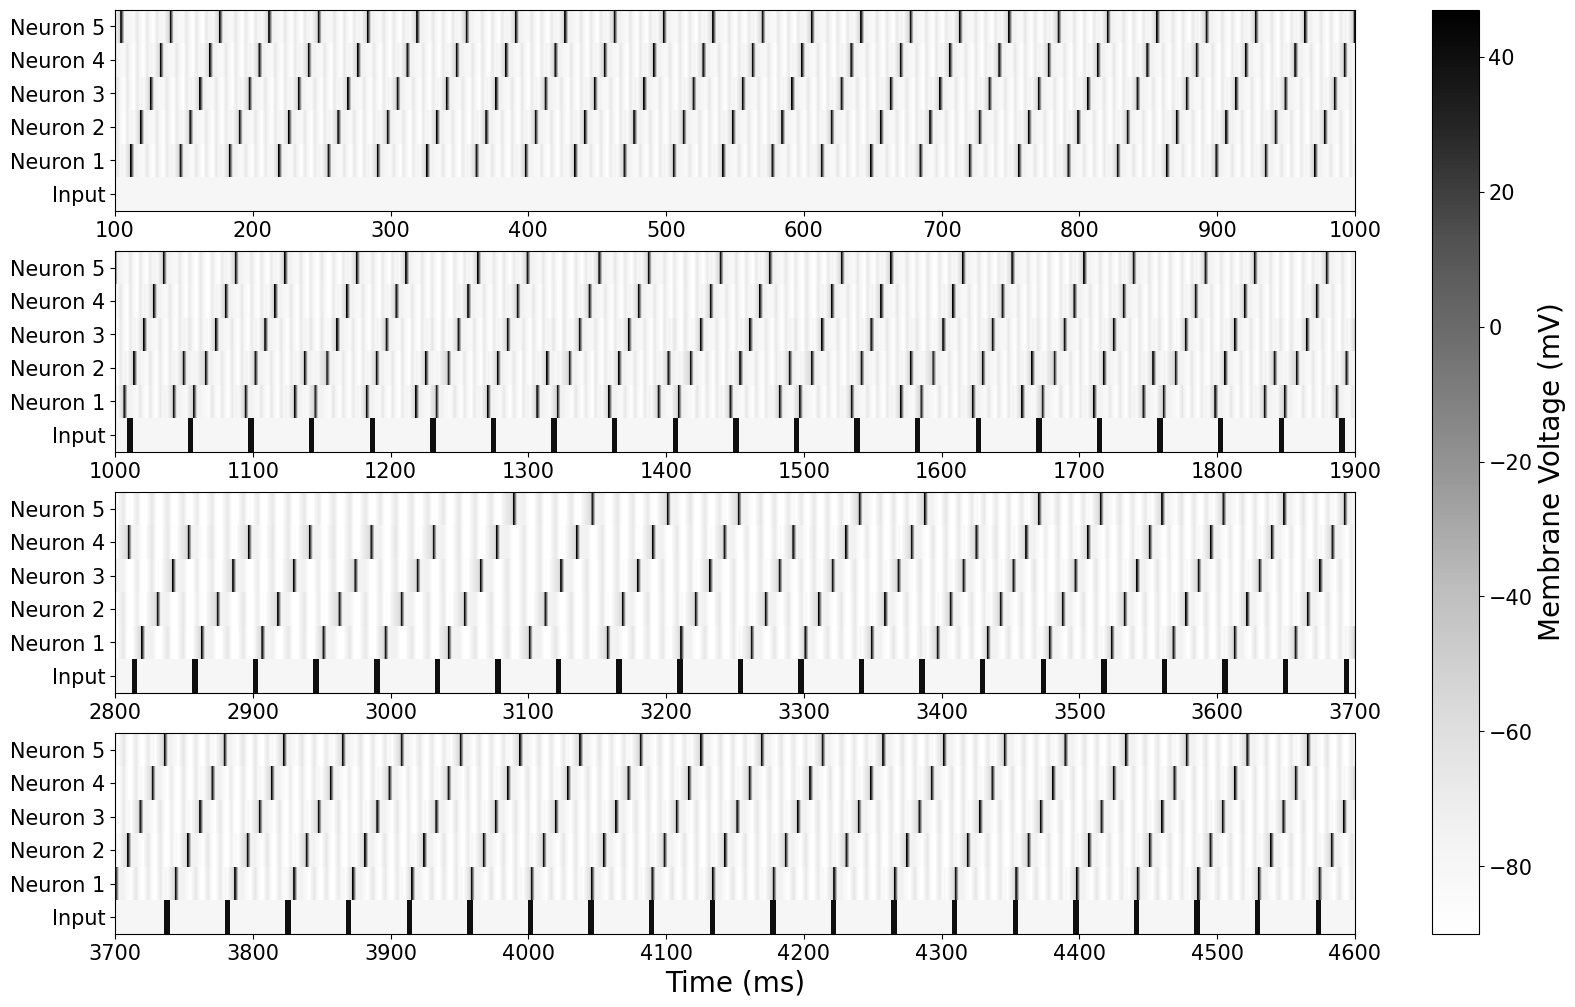

In [136]:
Time_line=np.arange(0,Time,dt)
start_time=int(100/dt)
data1 = np.array(outputs)[start_time+1:,::-1,0]
data2 = (inputs)[start_time+1:] 

data= np.concatenate((data1.T, data2.T), axis=0).T

print(data.shape)  # Expected output: (10, number_of_time_steps)

vmin_val = -90 
vmax_val = np.max(data)

caption_size=20
tick_size=15
label_size=20

vertical_lines = [900, 1900, 5000]

n_timepoints = data.shape[0]


fig, axes = plt.subplots(4, 1, figsize=(20, 12), sharey=True)


ax = axes[0]
start = 0
# Ensure the last segment includes any leftover points
end = int(900/dt)
segment = data[start+start_time:end+start_time, :].T
im = ax.imshow(segment, aspect='auto', interpolation='none', cmap='Greys', vmin=vmin_val, vmax=vmax_val,
                extent=[(start +start_time)* dt, (end +start_time)*dt, 0, data.shape[1]])
tick_positions = np.arange(0.5, 6, 1)
# Define the neuron names you want to show (make sure the list length equals num_neurons)
neuron_names = ['Input','Neuron 1','Neuron 2','Neuron 3','Neuron 4','Neuron 5']
ax.set_yticks(tick_positions, neuron_names, fontsize=tick_size)
ax.tick_params(axis='x', labelsize=tick_size)

ax = axes[1]
start = int(900/dt)
# Ensure the last segment includes any leftover points
end = int(1800/dt)
segment = data[start+start_time:end+start_time, :].T
im = ax.imshow(segment, aspect='auto', interpolation='none', cmap='Greys', vmin=vmin_val, vmax=vmax_val,
                extent=[(start +start_time)* dt, (end +start_time)*dt, 0, data.shape[1]])
tick_positions = np.arange(0.5, 6, 1)
# Define the neuron names you want to show (make sure the list length equals num_neurons)
neuron_names = ['Input','Neuron 1','Neuron 2','Neuron 3','Neuron 4','Neuron 5']
ax.set_yticks(tick_positions, neuron_names, fontsize=tick_size)
ax.tick_params(axis='x', labelsize=tick_size)

ax = axes[2]
start = int(2700/dt)
# Ensure the last segment includes any leftover points
end = int(3600/dt)
segment = data[start+start_time:end+start_time, :].T
im = ax.imshow(segment, aspect='auto', interpolation='none', cmap='Greys', vmin=vmin_val, vmax=vmax_val,
                extent=[(start +start_time)* dt, (end +start_time)*dt, 0, data.shape[1]])
tick_positions = np.arange(0.5, 6, 1)
# Define the neuron names you want to show (make sure the list length equals num_neurons)
neuron_names = ['Input','Neuron 1','Neuron 2','Neuron 3','Neuron 4','Neuron 5']
ax.set_yticks(tick_positions, neuron_names, fontsize=tick_size)
ax.tick_params(axis='x', labelsize=tick_size)

ax = axes[3]
start = int(3600/dt)
# Ensure the last segment includes any leftover points
end = int(4500/dt)
segment = data[start+start_time:end+start_time, :].T
im = ax.imshow(segment, aspect='auto', interpolation='none', cmap='Greys', vmin=vmin_val, vmax=vmax_val,
                extent=[(start +start_time)* dt, (end +start_time)*dt, 0, data.shape[1]])
tick_positions = np.arange(0.5, 6, 1)
# Define the neuron names you want to show (make sure the list length equals num_neurons)
neuron_names = ['Input','Neuron 1','Neuron 2','Neuron 3','Neuron 4','Neuron 5']
ax.set_yticks(tick_positions, neuron_names, fontsize=tick_size)
ax.tick_params(axis='x', labelsize=tick_size)


plt.xlabel('Time (ms)', fontsize=label_size)
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), label='Membrane Voltage (mV)')
cbar.set_label('Membrane Voltage (mV)', fontsize=label_size)  # Change label font size
cbar.ax.tick_params(labelsize=tick_size)

plt.show()
fig.savefig('new_total_voltage_raster_2.png')